In [132]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

from sklearn.model_selection import train_test_split
# Decision tree classifier from sklearn
from sklearn.tree import DecisionTreeClassifier
# json parsing
import json
# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix 
# cool visualisations
import seaborn

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [2]:
dataset = pd.read_csv("/home/manu/Documents/dogs_n_cats.csv")  

dataset.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [3]:
dataset.shape  

(1000, 6)

In [53]:
# checking if dataset has some null values
dataset.isnull().sum()

Длина                 0
Высота                0
Шерстист              0
Гавкает               0
Лазает по деревьям    0
Вид                   0
dtype: int64

In [102]:
# dividing the dataset into attributes and lables

X = dataset.drop('Вид', axis=1)  
y = dataset['Вид']


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  


In [104]:
classifier = DecisionTreeClassifier()  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [105]:
# let's look at the goodness of fit

classifier.score(X_train,y_train)

1.0

In [106]:
# our classifier is now trained... let's load the test dataset to make
# some prediction

with open('/home/manu/Documents/dataset_209691_15.json', 'r') as f:
    data_to_test = json.load(f)
    

In [107]:
df_from_test = pd.DataFrame.from_dict(data_to_test)

# dividing the test dataset into attributes and lables

new_X_test = df_from_test
new_X_test.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,25,30.0,1,1,0
1,34,40.8,1,1,0
10,23,27.6,1,1,0
11,23,27.6,1,1,0
12,20,24.0,1,0,0


In [108]:
new_X_test =X_test.sort_index()

new_X_test.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
4,16,19.2,1,1,0
16,18,21.6,1,1,0
18,27,32.4,1,1,0
28,22,26.4,1,1,0
31,23,27.6,1,1,0


In [118]:
# We have the index information, let's subset the original dataframe from these
# indices

dataset_to_get_y = dataset.loc[dataset.index.isin(new_X_test.index)] # subsetting index from test data to original

dataset_to_get_y.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
4,16,19.2,1,1,0,собачка
16,18,21.6,1,1,0,собачка
18,27,32.4,1,1,0,собачка
28,22,26.4,1,1,0,собачка
31,23,27.6,1,1,0,собачка


In [119]:
y_pred = classifier.predict(X_test)  
y_original = dataset_to_get_y['Вид']


In [120]:
# let's evaluate our model

print(confusion_matrix(y_original, y_pred))  
print(classification_report(y_original, y_pred))  

[[53 45]
 [45 57]]
              precision    recall  f1-score   support

       котик       0.54      0.54      0.54        98
     собачка       0.56      0.56      0.56       102

   micro avg       0.55      0.55      0.55       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.55      0.55      0.55       200



In [121]:
# plotting at different depths
max_depth_values = range(1, 100)

In [122]:
scores_data = pd.DataFrame()

In [123]:
for max_depth in max_depth_values:
    
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    
    clf.fit(X_train, y_train)
    
    train_score = clf.score(X_train, y_train)
    
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [124]:
scores_data.head()

,max_depth,train_score,test_score
0,1,1.0,1.0
0,2,1.0,1.0
0,3,1.0,1.0
0,4,1.0,1.0
0,5,1.0,1.0


In [125]:
# let's get the scores ready for visualisation

scores_data_long = pd.melt(scores_data, 
                           id_vars=['max_depth'], 
                           value_vars=['train_score', 'test_score'],
                           var_name='set_type', 
                           value_name='score')

In [126]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,1.0
1,2,train_score,1.0
2,3,train_score,1.0
3,4,train_score,1.0
4,5,train_score,1.0


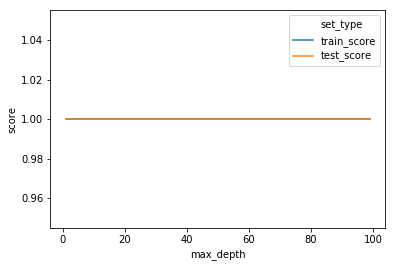

In [127]:
seaborn.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

In [129]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=1) 

In [130]:
cross_val_score(clf, X_train, y_train , cv=5) # validation score only

array([1., 1., 1., 1., 1.])

In [131]:
cross_val_score(clf, X_train, y_train , cv=5).mean()


1.0

In [133]:
cross_validate(clf, X_train, y_train , cv=5)

/home/manu/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.00844812, 0.0041976 , 0.00232196, 0.00240374, 0.00184059]),
 'score_time': array([0.00332618, 0.00161386, 0.001055  , 0.00109863, 0.00107241]),
 'test_score': array([1., 1., 1., 1., 1.]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [134]:
scores_data = pd.DataFrame()


In [136]:
for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train , cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [137]:
scores_data_long = pd.melt(scores_data, 
                           id_vars=['max_depth'], 
                           value_vars=['train_score', 'test_score', 'cross_val_score'],
                           var_name='set_type', 
                           value_name='score')

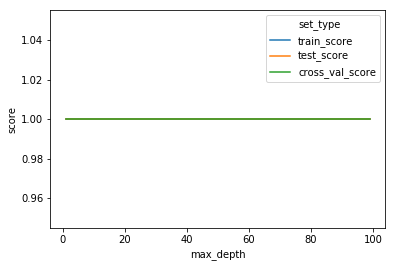

In [138]:
seaborn.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

In [139]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,1.0
199,2,cross_val_score,1.0
200,3,cross_val_score,1.0
201,4,cross_val_score,1.0
202,5,cross_val_score,1.0
203,6,cross_val_score,1.0
204,7,cross_val_score,1.0
205,8,cross_val_score,1.0
206,9,cross_val_score,1.0
207,10,cross_val_score,1.0


In [140]:
qq = scores_data_long.query("set_type == 'cross_val_score'")

In [141]:
qq.score.max()

1.0

In [143]:
best_clf = DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [144]:
best_clf.fit(X_train, y_train)



DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [145]:
best_clf.score(X_test, y_test)

1.0